# COGS 108 - Final Project 

# Overview

Although restaurants in the United states receive an official health Inspection score provided by their State governments, I wanted to analyze how various factors affect the overall ratings of a restaurant by taking into account the data of everyday customers. Collecting restaurant data from Yelp, I was able to conduct analysis on consumer ratings, review counts, as well as pricing of many eateries across the state of North Carolina. In doing so, I aimed to ask whether or not there was a significant relationship between the health inspection grading of cheaper vs pricier restaurants across North Carolinare relative to Yelp's overall user ratings, specifically number of stars and number of reviews. Using various statistical methods and techniques, I found that there was no conclusive correlation between pricing and health inspection grading, but instead, smaller yet significant correlations between the predictors themselves.

# Name & PID

- Name: Alexis Doan
- PID: A14610025

# Research Question

Is there a relationship between the health inspection grading of cheaper vs more expensive restaurants in North Carolina relative to Yelp consumer ratings?

## Background and Prior Work

North Carolina is the 9th most populated state in the United States, home to around 10.49 million people
(http://ncagr.gov/fooddrug/food/inspections.htm ). It's approximately 18,500 retail food establishments (https://linkbusiness.com/knowledge-center/Article/An-Overview-of-the-Restaurant-Industry-in-Raleigh%2C-North-Carolina ) are among the prime hot spot eateries you can find on Yelp, a popular website and app containing crowd-sourced user reviews/recommendations about restaurants and other businesses. User reviews can contain anything from how they rated the the friendliness of the staff to wait time, menu variety, and most importantly the cleanilness of the restaurant and food preparation. Restaurant and food vendors must do their due diligence in making sure that they follow "food safety". In doing so, they are responsible for the means in which they handle, prepare, and store food as their main goal is to prevent any food-borne illness. Since the North Carolina Department of Agriculture and Consumer Services is in charge of keeping a close eye on the food safety of public restaurants, I wanted to extend this information into observing whether or not there is a correlation between Yelp consumer ratings of restaurants in North Carolina and their health inspection grading provided by the Department of Agriculture and Consumer Services. Yelp's data will provide insight into restaurants that need more continual inspections or warnings through the feedback of customers. This information can help alert North Carolina's Health Inspection system of any food safety issues or violations of their health code that they need to examine and assess. 

The North Carolina Health Department is one of several in the nation to use the "Know the Score" program. This program allows the state to communicate the health inspection grading of its restuarants to the public. Depending on the establishment being inspected, specialists have a list of compliance areas, or rules, they must check. For example, all restaurants must comply with the “Rules Governing the Sanitation of Restaurants and Other Food handling Establishments.” Specialists must check compliance with areas like food cooking and cooling temperatures; cleanliness of equipment and utensils; waste disposal; lighting, ventilation; storage areas for toxic substances such as bleach, cleaning powders, and pesticides; and other standard health inspection areas. Once a specialist has performed an inspection, he or she formulates a numeric score and translates the score into a grade based on the quality of compliance for each area (https://cga.ct.gov/2005/rpt/2005-R-0403.htm ). This "score" (90-100=A, 80-89=B, 70-79=C) is a crucial part of the data I will use to map out the relationship between the condition of these restaurants in relation to Yelp's consumer reviews and overall ratings. I was able to find a previous group's final project on Github, which utilized Yelp reviews from Chicago to track which areas of crime are higher than others. Their research consisted of using Yelp's data, more specifically Yelp's API to understand how real consumers perceive the qualtiy of a restaurant. This source of data is valuable as it provides me with information to compare and contrast the inspection results from restaurants all across North Carolina based on Yelp's health score. Their research also made me aware that although Yelp has hundreds of various attributes when it comes to user reviews, I need to pick the specific attributes that apply to my research question and do a deep dive analysis of it. 

References (include links):
- 1)http://ncagr.gov/fooddrug/food/inspections.htm
- 2)https://github.com/COGS108/FinalProjects-Sp17/blob/master/006-FinalProject.ipynb
- 3)https://cga.ct.gov/2005/rpt/2005-R-0403.htm
- 4)https://linkbusiness.com/knowledge-center/Article/An-Overview-of-the-Restaurant-Industry-in-Raleigh%2C-North-Carolina

# Hypothesis


I predict that more expensive restaurants in North Carolina will receive higher Yelp star ratings (4+) as well as higher counts of user reviews (30+) and will correlate with official inspection scores of at least a 90 or higher (90+ or A). Cheaper restaurants will receive lower Yelp star ratings (3-), less counts of user reviews (30-) and will correlate with inspection scores of less than 90 (90- or B or C).

# Datasets

## Health Inspections Dataset
- Dataset Name: Inspections
- Number of observations: 18,467

The Inspections Dataset consists of North Carolina State official health inspection scores from all of its restaurants during the years 2012 to 2016. Most restaurants were inspected multiple times throughout each year and this dataset gives us a rundown of the details of each inspection such as address, zipcode, days since the restaurant opened, days since the last inspection, critical score evaulations, overall inspection grading, etc. 

## Yelp Dataset
- Dataset Name: Yelp
- Number of observations: 3,689

The Yelp Dataset consists of any North Carolina businesses who registered to have a public page on Yelp to which their customers can evaulate that business through overall rating scores. In my case however I only want to focus on restuarants with Yelp information, so I will pick important factors to be used in my future analysis, such as the pricing of the restaurant symbolized by a $ dollar sign as well as the amount of user reviews each restaurant got. 

## Combining these Datasets
Considering the fact that both datasets I am using will have different ways of classifying the restaurants, I may run into duplication issues such as similar names, ID, etc. In order to combine these datasets in a valid and reliable way, I will first track the locational latitude and longitude values (seen as the X and Y coordinates on the datasets) of the restaurants in order to efficiently compare each restuarants' inspection data with both it's correct pricing and yelp rating if it does in fact have a public presence on yelp. This is the easiest means of keeping track of each individual restaurant's information prior to when I begin cleaning the data because the datasets have no restaurant ID uniformly linking its information across both datasets since the datasets come from different sources.

# Setup

In [1]:
## IMPORTS
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

#Rounding latitude & longitude values
num_decimal_places = 5

In [2]:
## READING IN DATASETS 
df_inspections = pd.read_csv('inspections.csv')
df_yelp = pd.read_csv('yelp.csv').dropna()

# Data Cleaning

I will only be using restaurants that have relevant/available information on both datasets. By cleaning the data I can then assign the restaurant its own unique ID in order to help organize my data and stay consistent. Many restaurants have had multiple health inspections throughout the year 2016 so their scores may vary, I will 

For the INSPECTION DATA, I will round the longitude and latitude values to 5 decimal places. This will allow me to combine them into 1 data point that cam easily be used to account for each unique restaurant as some restaurants can have similar/identical names but of course cannot have the same geolocation. I will begin cleaning the data by dropping Nan columns (columns with no data) as well as columns I do not need.

In [3]:
## Starting the Data Cleaning Process with the INSPECTION DATASET
## Saving a copy of raw longitude & latitude values if needed future analysis use
df_inspections_raw = df_inspections.copy()

## Longitude values = x
## Latitude values = y
df_inspections['x']  = df_inspections['x'].round(num_decimal_places)
df_inspections['y']  = df_inspections['y'].round(num_decimal_places)

## A string to concisely represent the restaurants entire location
df_inspections['Location'] = df_inspections['x'].astype(str) + ',' + df_inspections['y'].astype(str)

## Dropping unnecessary columns irrelevant to my data analysis or columns that give away personal info
df_inspections = df_inspections.drop(['hsisid', 'x', 'y', 'address2', 'city', 'postalcode',
                                    'phonenumber', 'restaurantopendate', 'days_from_open_date', 
                                    'geocodestatus', 'inspectedby', 'inspection_num', 'inspector_id', 
                                    'previous_inspection_date', 'days_since_previous_inspection',
                                    'previous_inspection_by_same_inspector', 'second_match', 'top_match',
                                    'num_critical_previous', 'num_non_critical_previous', 'num_critical_previous',
                                    'num_critical_mean_previous', 'num_non_critical_mean_previous',
                                    'avg_neighbor_num_critical', 'avg_neighbor_num_non_critical', 'address1',
                                     'description'], 
                                    axis = 1)

## We also need to account for date of inspection because many of these restaurants have been inspected every year
## since 2012 in the INSPECTIONS DATASET, so we will only use the data from its recent year (2016) and discard those 
## from before 2016 as a means to avoid duplicate locational latitudes and longitudes that could mess up our analysis.
df_inspections['date'] = pd.to_datetime(df_inspections['date'])
df_inspections = df_inspections[(df_inspections['date'] >= '2016-01-01') & 
                                (df_inspections['date'] <= '2016-12-31')]

## A preview of the cleaned dataset
df_inspections

,date,name,state,facilitytype,zip,type,score,num_critical,num_non_critical,critical,Location
14059,2016-02-04 00:00:00+00:00,POLAR ICE HOUSE,NC,Restaurant,27606,Inspection,97.0,1,4,1,"-78.74548,35.7654"
14106,2016-01-04 00:00:00+00:00,Harris Teeter #289 Deli,NC,Restaurant,27608,Inspection,96.0,1,4,1,"-78.6606,35.8155"
14107,2016-01-04 00:00:00+00:00,Remington Grill,NC,Restaurant,27604,Inspection,97.0,1,3,1,"-78.55807,35.79981"
14108,2016-01-04 00:00:00+00:00,Subway #3262,NC,Restaurant,27513,Inspection,92.5,4,9,1,"-78.76838,35.82981"
14109,2016-01-04 00:00:00+00:00,CHANELLO'S PIZZA OF GARNER,NC,Restaurant,27529,Inspection,90.0,6,12,1,"-78.61154,35.63067"
...,...,...,...,...,...,...,...,...,...,...,...
18461,2016-11-03 00:00:00+00:00,Sino Wok,NC,Food Stand,27616,Inspection,93.0,6,13,1,"-78.57159,35.86546"
18462,2016-11-03 00:00:00+00:00,Weatherstone Elem. Sch. Cafeteria,NC,Public School Lunchrooms,27513,Inspection,97.0,2,3,1,"-78.81014,35.79244"
18463,2016-11-03 00:00:00+00:00,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,NC,Public School Lunchrooms,27519,Inspection,96.0,3,4,1,"-78.89958,35.85913"
18464,2016-11-03 00:00:00+00:00,Food Lion #996 Meat Market,NC,Meat Market,27603,Inspection,99.0,1,2,1,"-78.69734,35.6652"


For the YELP DATA, I will round the longitude and latitude values. This will allow me to combine the values into a single data point that can easily trace back to each unique restaurant in the Location column. I will begin cleaning the data by dropping Nan columns (columns with no data) as well as columns irrelevant to my analysis.

In [4]:
## Starting the Data Cleaning Process with the YELP DATASET
## Saving a copy of raw longitude & latitude values if needed for future analysis use
df_yelp_lat = df_inspections.copy()

## Rounding longitude and latitude values
df_yelp['longitude']  = df_yelp['longitude'].round(num_decimal_places)
df_yelp['latitude']  = df_yelp['latitude'].round(num_decimal_places)

## A string to concisely represent the restaurants entire location
df_yelp['Location'] = df_yelp['longitude'].astype(str) + ',' + df_yelp['latitude'].astype(str)

## Dropping unnecessary columns irrelevant to my data analysis or columns that give away personal info
df_yelp = df_yelp.drop(['id', 'is_closed', 'latitude', 'longitude', 'phone', 'hotdogs', 'sandwiches',
                       'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery', 'breakfast_brunch',
                       'coffee', 'chinese', 'italian', 'newamerican', 'chicken_wings', 'delis', 'bars',
                       'salad', 'seafood', 'bbq', 'bakeries', 'sushi', 'address1'], 
                                    axis = 1)

## A preview of the cleaned dataset
df_yelp

,name,rating,review_count,zip_code,price,Location
2,luciano pizzeria ristorante,5.0,2,27612,$,"-78.67879,35.83968"
3,olive garden italian restaurant,3.0,16,27893,$$,"-77.96416,35.74317"
4,subway,3.5,3,27896,$,"-77.99943,35.76294"
5,trent restaurant,5.0,5,28573,$$$,"-77.2197,35.00789"
6,bailey cafe,4.5,10,27807,$,"-78.1184,35.77895"
...,...,...,...,...,...,...
3683,carter-finley stadium,3.5,23,27607,19198344000,"-78.71957,35.80122"
3684,raleigh little theatre,3.5,24,27607,19198213111,"-78.66882,35.79143"
3685,"sky zone trampoline park, durham",4.0,12,27701,19194250800,"-78.914,36.0209"
3686,highgrove estate,3.5,4,27526,19195526154,"-78.80775,35.5572"


# Data Analysis & Results

## EDA & Analysis
For my analysis, I will combine the inspection results of restaurants with their accompaning yelp review data such that restaurants have their 1 unique row and index according to their geolocation. Any restaurants that had data from the inspection results but did not show up in the Yelp Dataset will be dropped as they cannot be used for analysis and may create outliers in our results. The best method to utilize in my case is an INNER MERGE as it will combine the 2 cleaned datasets and return a new dataframe that contains only those rows that have matching values in both of the original dataframes based on a particular key which in my case is 'LOCATION'. This is important as I should not include any restaurants that DO have data from the Inspections dataset but DO NOT have data within the Yelp dataset. I will also adjust the sentimental value of the price column by signifying a single dollar sign as 'cheap' and a double or triple '$$' as 'expensive'.

In [5]:
## Chain restaurants will have the same exact name but different locations. The Inspection dataset does a decent job
## at differentiating the restaurants by adding a unique number to chain restaurants so I will keep the name given
## from the inspection dataset and discard the alternative name given by yelp
df_yelp = df_yelp.drop(['name', 'zip_code'], axis = 1)

## Price change from $ and $$/$ to cheap and expensive
df_yelp = df_yelp.replace(to_replace = ['$','$$', '$$$'], value = ['Cheap', 'Expensive', 'Expensive'])

## Using an INNER MERGE to combine my inspections and yelp datasets
## Left and Right Dataframes
merged_df = pd.merge(left = df_inspections, right = df_yelp, left_on = 'Location', right_on = 'Location')

## Renaming columns for purpose of analysis


merged_df

,date,name,state,facilitytype,zip,type,score,num_critical,num_non_critical,critical,Location,rating,review_count,price
0,2016-01-04 00:00:00+00:00,Remington Grill,NC,Restaurant,27604,Inspection,97.0,1,3,1,"-78.55807,35.79981",3.0,15,Cheap
1,2016-07-12 00:00:00+00:00,Remington Grill,NC,Restaurant,27604,Inspection,95.0,1,5,1,"-78.55807,35.79981",3.0,15,Cheap
2,2016-01-04 00:00:00+00:00,MCDONALD'S #25393,NC,Restaurant,27614,Inspection,95.5,2,4,1,"-78.55962,35.9421",1.0,8,Cheap
3,2016-01-05 00:00:00+00:00,MY WAY TAVERN,NC,Restaurant,27605,Inspection,96.0,2,5,1,"-78.6506,35.78716",4.0,34,Expensive
4,2016-08-12 00:00:00+00:00,MY WAY TAVERN,NC,Restaurant,27605,Inspection,99.0,0,3,0,"-78.6506,35.78716",4.0,34,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2016-09-21 00:00:00+00:00,MELLOW MUSHROOM,NC,Restaurant,27513,Inspection,93.5,8,9,1,"-78.82815,35.7902",3.5,143,Expensive
508,2016-09-23 00:00:00+00:00,CAROLINA BREWING COMPANY TAPROOM,NC,Restaurant,27540,Inspection,99.0,0,1,0,"-78.85474,35.65649",4.5,27,Cheap
509,2016-09-29 00:00:00+00:00,Texas Roadhouse #294,NC,Restaurant,27587,Inspection,95.0,2,6,1,"-78.54034,35.95646",3.5,55,Expensive
510,2016-09-29 00:00:00+00:00,GOLDEN CORRAL #942,NC,Restaurant,27604,Inspection,91.0,13,13,1,"-78.58441,35.8268",3.0,28,Expensive


By playing close attention to the data provided by my Yelp dataset I noticed that our data was not filtered to contain only restaurants, as the data consisted of all Yelp information from the state of North Carolina. This means that our data also contained places we did not want to use such as pet hospitals, spas, autoshops, etc. This is why my dataframe at the end of the data cleaning portion will have less than 3,689 rows and instead 512 rows.

In [6]:
merged_df.shape

(512, 14)

For the purposes of analyzing a restaurant's overall inspection score, I will drop the number of critical and noncritical points as my analysis focuses more on the official state level score given to each restaurant not necessarily how and where they misses points. 

In [7]:
## I am removing columns that at this point are unnecessary to my analysis
merged_df = merged_df.drop(['type', 'num_critical', 'num_non_critical', 'critical', 'facilitytype', 'zip'], axis = 1)

## I will sort restaurants by health inspection score
merged_df = merged_df.sort_values(by = ['score'])
merged_df.columns = ['Date of Inspection', 'Name of Restaurant', 'State', 'Inspection Score', 'Location',
                    'Rating', 'Review_Count', 'Price']

## Resetting index
merged_df.reset_index(inplace = True, drop = True) 



##For the sake of linear regression analysis I need to make my price column an actual variable
merged_df = merged_df.replace(to_replace = ['Cheap','Expensive', 'Expensive'], value = ['0', '1', '1'])
merged_df

,Date of Inspection,Name of Restaurant,State,Inspection Score,Location,Rating,Review_Count,Price
0,2016-08-26 00:00:00+00:00,HONG KONG CHINESE KITCHEN,NC,79.0,"-78.72051,35.78413",1.5,9,1
1,2016-08-12 00:00:00+00:00,KABAB &amp; GRILL,NC,80.0,"-78.78206,35.77335",3.0,29,1
2,2016-06-28 00:00:00+00:00,EDWARDS MILL BAR AND GRILL,NC,84.0,"-78.70696,35.82544",3.0,53,1
3,2016-08-18 00:00:00+00:00,Teddy's New Yorker Pizza,NC,84.5,"-78.72051,35.78413",1.5,9,1
4,2016-09-12 00:00:00+00:00,LITTLE TOKYO,NC,85.5,"-78.76026,35.77377",3.0,70,0
...,...,...,...,...,...,...,...,...
507,2016-07-12 00:00:00+00:00,Sam`s Club #8223 Meat Market,NC,99.5,"-78.64662,35.75037",2.5,10,1
508,2016-05-02 00:00:00+00:00,Food Lion #1589 Meat Market,NC,99.5,"-78.72584,35.62515",3.0,1,1
509,2016-07-18 00:00:00+00:00,Harris Teeter #38 Meat Market,NC,99.5,"-78.72051,35.78413",1.5,9,1
510,2016-05-05 00:00:00+00:00,Neo-Asia,NC,99.5,"-78.70776,35.86036",3.0,53,1


Next I will run a least squares linear regression to see if there is a correlation between the data in my table.

The first correlation I will run will be between Inspection Score and Rating

In [8]:
import statsmodels.formula.api as lr

merged_df['y'] = merged_df['Inspection Score']
merged_df['x1'] = merged_df['Rating']
lr.ols(formula = 'y ~ x1', data = merged_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.281
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00720
Time:                        15:16:34   Log-Likelihood:                -1246.4
No. Observations:                 512   AIC:                             2497.
Df Residuals:                     510   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.3669      0.568    166.074      0.000      93.251      95.483
x1             0.4215      0.156      2.698      0.007       0.115       0.728
==============================================================================
Omnibus:                      183.833   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.351
Skew:                          -1.600   Prob(JB):                    2.55e-159
Kurtosis:                       7.898   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The next correlation will be between Inspection Score and Review Count

In [9]:
merged_df['x2'] = merged_df['Review_Count']
lr.ols(formula='y ~ x2', data=merged_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3584
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.550
Time:                        15:16:34   Log-Likelihood:                -1249.8
No. Observations:                 512   AIC:                             2504.
Df Residuals:                     510   BIC:                             2512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.9124      0.147    652.447      0.000      95.624      96.201
x2            -0.0010      0.002     -0.599      0.550      -0.004       0.002
==============================================================================
Omnibus:                      199.504   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.155
Skew:                          -1.696   Prob(JB):                    2.30e-198
Kurtosis:                       8.582   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The next correlation will be between Inspection Score and Price 

In [10]:
merged_df['x3'] = merged_df['Price']
lr.ols(formula='y ~ x3', data=merged_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01867
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.891
Time:                        15:16:34   Log-Likelihood:                -1250.0
No. Observations:                 512   AIC:                             2504.
Df Residuals:                     510   BIC:                             2512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.8834      0.187    514.030      0.000      95.517      96.250
x3[T.1]       -0.0339      0.248     -0.137      0.891      -0.522       0.454
==============================================================================
Omnibus:                      198.288   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.485
Skew:                          -1.689   Prob(JB):                    9.60e-195
Kurtosis:                       8.520   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation Summary

In [11]:
lr.ols(formula='y ~ x1 + x2 + x3', data=merged_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.847
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0371
Time:                        15:16:34   Log-Likelihood:                -1245.7
No. Observations:                 512   AIC:                             2499.
Df Residuals:                     508   BIC:                             2516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.3636      0.582    162.233      0.000      93.221      95.506
x3[T.1]       -0.0431      0.247     -0.174      0.862      -0.529       0.443
x1             0.4545      0.159      2.858      0.004       0.142       0.767
x2            -0.0019      0.002     -1.102      0.271      -0.005       0.001
==============================================================================
Omnibus:                      184.120   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.599
Skew:                          -1.601   Prob(JB):                    3.05e-160
Kurtosis:                       7.917   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

EDA Analysis based on linear regression summaries:

For each regression I ran on my merged_df data, I noticed that the R^2 value was always around 0, and the P > |t| values were relatively large when it came to review count and pricing and was greater than any conventional significance level. Based on the summaries, the correlations are not very meaningful in two different senses. The low R^2 value can be understood as stating that the regression based on each predictive factor (Yelp rating, Yelp review count, Pricing) does not successfully account for any of the variation in the health inspection scores. Meanwhile, the high p values can be interpreted as meaning that any correlation that does occur between the variables of interest is no more significant than the random variation that would have occurred by chance alone. There is more correlation between Yelp's data of rating and pricing than say Yelp's data being significantly predicitve of what health inspection score each restaurant gets.

Checking for MULTIPLE COLINEARITY: 

If we have two predictors such that Yelp rating and Yelp review count are predictors for health inspection scores, we'll want to consider how similar the values are between predictors. In this case we will want to consider how similar Yelp ratings are to Yelp's review counts of the restaurants. 

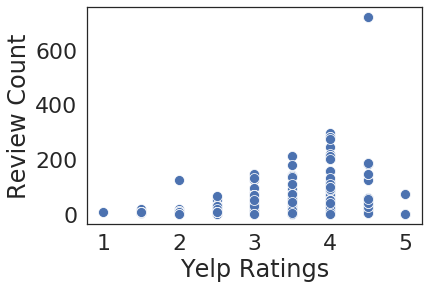

In [12]:
# relationship between predictors
sns.scatterplot(x='Rating', y='Review_Count', data=merged_df, s=100)
plt.xlabel('Yelp Ratings')
plt.ylabel('Review Count');

From our scatterplot above, we can see that there is some relationship between the rating of users and the amount of reviews posted for restaurants on Yelp. Higher ratings received more volume of user reviews/comments while lower ratings received less user reviews overall.

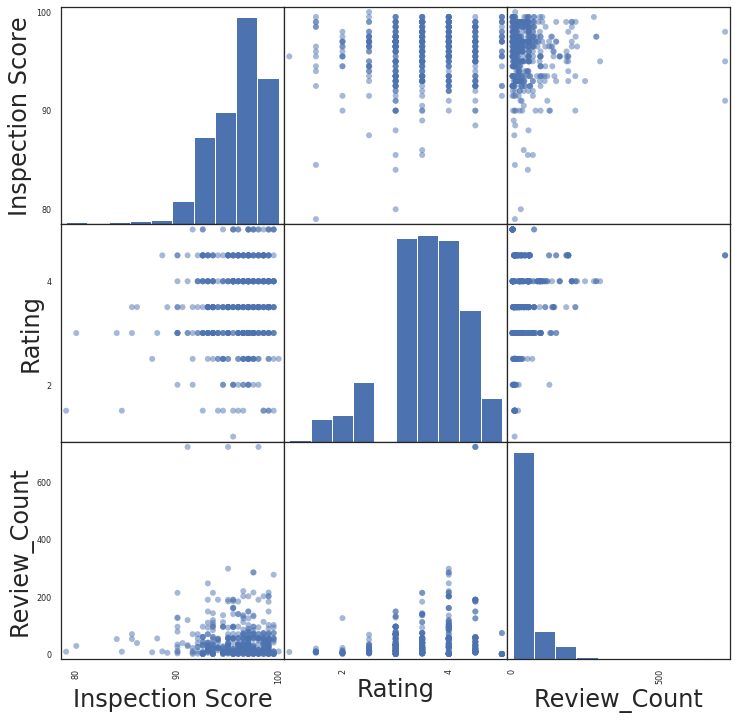

In [13]:
pd.plotting.scatter_matrix(merged_df[['Inspection Score', 'Rating', 'Review_Count']], figsize=[12, 12], marker=12);  

From our scatter matrix above we see that review count and inspection score were correlated in that higher inspection scores of 90 and tends to gravitate to a higher volume of user reviews. The same was found with inspection scores and ratings, there tends to be a higher volume of 3-5 star ratings when inspection scores were in the 90s and up.

## Data Visualization

I decided to first visualize the collected data of every inspected restaurant in the state of North Carolina on a scatter plot. By simply plotting the longitude and latitude locations of each restaurant, I was able to get a detailed map of every restaurant that was recorded in the Inspections Dataset. The scatter plot is color coordinated such that we are visualizing restaurants across North Carolina by their overall inspection score. Areas with higher rated restaurants in terms of state official health inspection scores were defined in the lighter orange color (majority of the plot) and lower rated inspected restaurants were defined in the darker red/orange color. This ended up giving me a rough estimate of whether or not the majority of restaurants around North Carolina were best up to par with the health code standards. This plot does not tell us much in terms of correlation related to our question but it does being to show us visually where the majority of restaurants typically fall into with regards to health inspection scores (low vs high), in this case most were high.

Text(0, 0.5, 'Longitude')

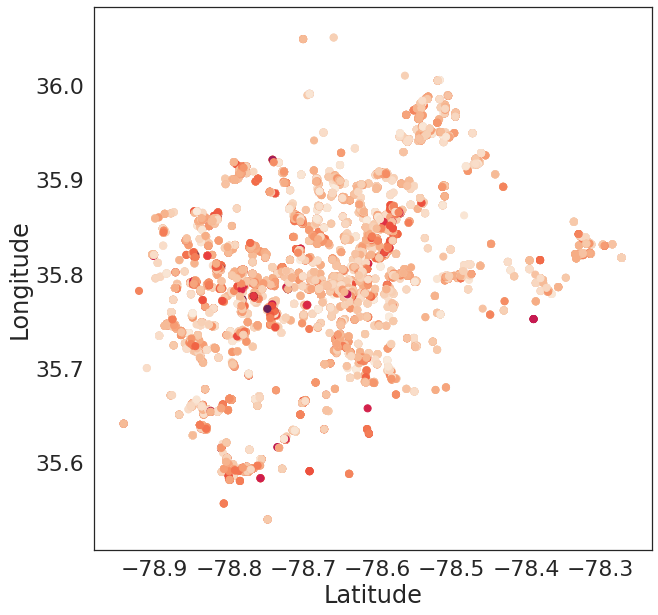

In [14]:
# Scatter plot of where observed inspected restaurants are in North Carolina 
# and the range of health inspection score they are in
plt.figure(figsize = (10, 10))
plt.scatter(df_inspections_raw['x'], df_inspections_raw['y'], s = 50, c = df_inspections_raw['score'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

This next scatterplot visualizes the relationship between Yelp Ratings of each restaurant (1-5 stars) and their corresponding Inspection Score characterized by a distinct blue or orange dot to represent their price point. Orange dots represent restaurants on the more expsensive end while blue dots represent cheaper restaurants. From our plot we see that most expensive restaurants score health inspection scores in the high range of 90+ but quite a few also landed in the lower range of scores. Their scores also correlated with diverse Yelp ratings all the way from 1.5 stars to 5 stars but most with high inspection scores also had high Yelp reviews (3.5 and up). Cheaper restaurants however did not have as much variation, inspection scores never reached below an 85 and many landed in the same vicicnity as the pricier restaurants 90+. Yelp ratings were also quite higher 3.5 - 5 when their corresponding health inspection scores were midrange (85-90).
### Blue represents Cheap (0), Orange represents Expensive (1)

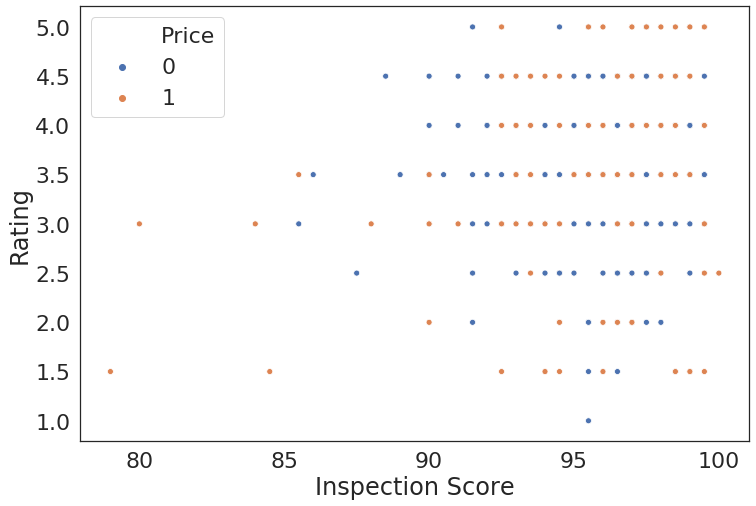

In [15]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x="Inspection Score", y="Rating",
                      hue="Price", data = merged_df)

This next visualization is a bar graph that represents the relation between cheap vs expensive restaurants in terms of their amount of reviews. Cheap restaurants will be in one bin and Expensive Restaurants will be in another on the X-axis while the average of all review counts from each bin will be displayed on the Y-axis. From our bar graph we see that on average, expensive restaurants receive more user attention and review posts than cheaper restaurants.
### Blue represents Cheap (0), Orange represents Expensive (1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


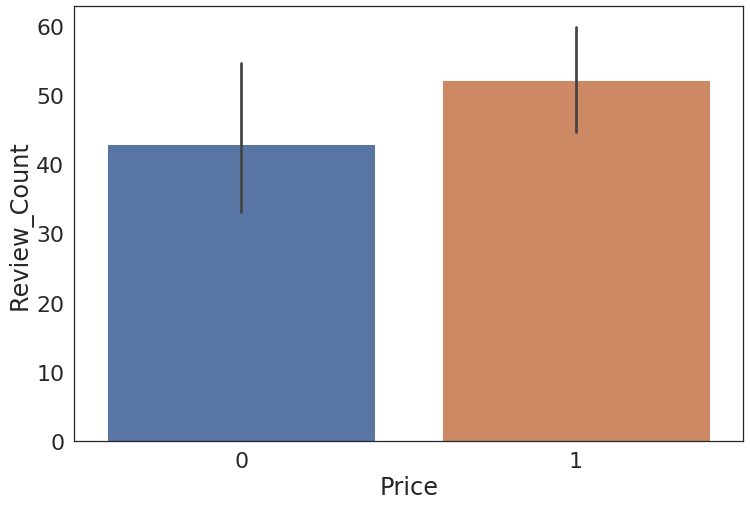

In [16]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x="Price", y="Review_Count", data=merged_df,
                  order=["0", "1"])

# Ethics & Privacy

For the purpose of this project, I will ensure that all datasets I use are released to the public by both Yelp and the North Carolina state government in order to have reliable and comprehensive documentation of all data and sources I use. Given that the information provided by Yelp's API as well as the North Carolina Health Department's inspection results are public, I believe I have permission to use this data in order to find useful information and correlations as long as there is no breach in privacy.

Considering my research question explores data provided by real users of Yelp who share personal information, I will remove any personal identification from the consumer reviews I use from yelp including name, location, age, etc. It is important that I maintain anonymity for all people involved from the consumers to the restaurant owners as I will omit any critical demographic information in my data and analysis. 

If there is potential for any unintended harm, this may come at the topic of restaurant competitiveness or sabotage. However in light of knowing this I will not highlight any information in my data analysis that points directly to any specific restaurant. The data analysis I present in my results will be considered in a generalized scope such that their name, address, etc. will be replaced by a unique ID that I have generated for them such that no personally identifying attributed are taken into consideration as I aim to ethically evaluate solely how cheap vs expensive restaurants compare and correlate to yelp reviews and inspection scores. No particular restaurants' name nor affiliation will be at the center of my analysis.

# Conclusion & Discussion

After performing a deep dive analysis of my datasets, I could not find a conclusive correlation between the  relationship of health inspection grading of cheaper vs more expensive restaurants in North Carolina relative to Yelp consumer ratings. When trying to answer my question, I selected 3 specific factors that I believed played a major role in prediciting the official health inspection scores of restaurants in North Carolina. In addition to the restaurant health inspection dataset, I decided to include a Yelp review dataset, providing another metric for me to evaluate a correlation between restaurant pricing and health inspection scores. However, Yelp's pricing, star rating, and review count did not give me enough statisical power to where I could determine if my predictors in question played a significant role on the outcome (inspection score) of cheap vs pricey restaurants. 

Analyzing my data visually, I found that although my scatterplots provided some correlation between high inspection scores and high Yelp ratings, the predictor of pricing could not give me a conclusive result. It was not enough to state a conclusive relationship because whether or not the restaurant was cheap or expensive, the same exact correlation occurred where most high inspection scores gravitated to high Yelp ratings. In that sense pricing is not a definite predictor in how inspection scores share a relationship with Yelp consumer ratings. Moreso, analyzing the variations between my scatterplot and bar graph, I found that any real relationship that could be defined through my datasets would have been between health inspection scorse and Yelp ratings as well as between Yelp review counts and pricing.  

Overall, parts of my hypothesis were wrong in that I could not find a conclusive relationship between the inspection scores of cheap vs pricey restaurants. Although I was right in that restaurants with higher Yelp ratings and review counts would receive higher inspection scores, this correlation was irrelevant to pricing as I saw no definite and significant relationship between my price predictors and inspection score outcomes. 


In regards to my current analysis and what I would have done different, I would like to discusss the many limitations that my dataset unfortunately gave me. I found that although we used the most recent year of health inspection scores, that many restaurants had inspections done throughout the year so there were varying scores for the same exact restaurant. The varying inspection scores created limitations to the methods I used to do my analysis such that some restuarants are providing double or triple data despite me picking only 1 year which was the most recent year from the dataset. This limits the extent to which my analysis and data can fully and accurately predict the relationship between cheap and expensive restaurants to their health inspection scores throughout North Carolina in relation to Yelp data such as the pricing, ratings, and review counts. Another limitation that my question creates is sample size, because I want to understand if there is a relationship between restaurant health inspection scores and Yelp ratings, I leave out a lot of restaurants and thus a lot of data about the health inspection scores from around North Carolina. Not every restaurant is going to be on Yelp and thus the results I do get might not be as representative as we could theoretically get if in a perfect world every restaurant that every existed was publicly on Yelp. Taken together, it is obvious that my question could not be fully answered and that as a result my hypothesis was false. After completing my analysis I understand that the predictive power I believed would exist simply did not manifest in the real world data.